In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [58]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


C:\Users\devel\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


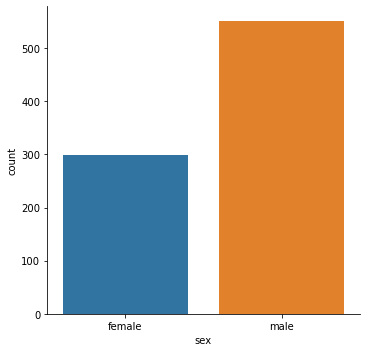

In [59]:
sns.factorplot('sex',data=titanic_df,kind='count')

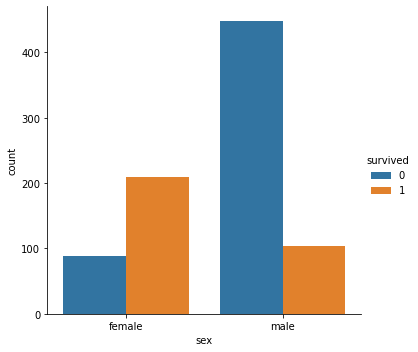

In [60]:
 sns.factorplot('sex',kind='count',data=titanic_df,hue='survived')

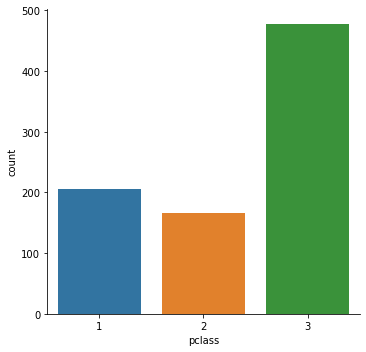

In [61]:
sns.factorplot('pclass',data=titanic_df,kind='count')

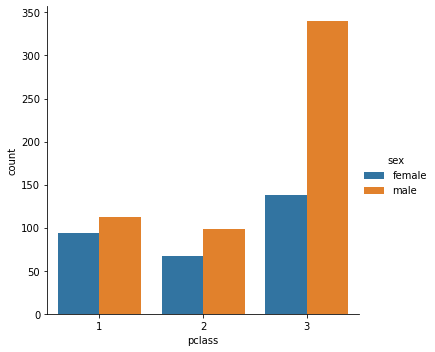

In [62]:
sns.factorplot('pclass',data=titanic_df,hue='sex',kind='count')

In [63]:
def titanic_children(passenger):
    age , sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['age','sex']].apply(titanic_children,axis=1)

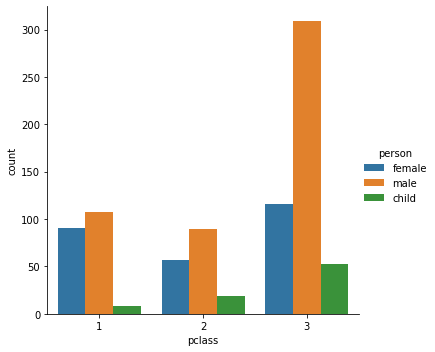

In [64]:
sns.factorplot('pclass',data=titanic_df,hue='person',kind='count')

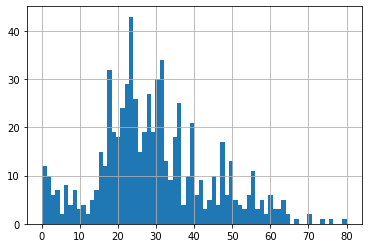

In [65]:
titanic_df['age'].hist(bins=70)

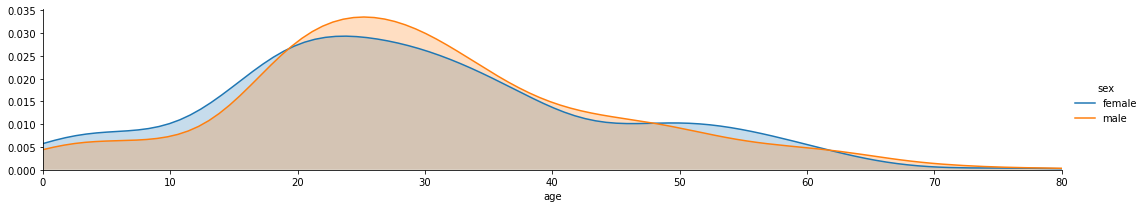

In [66]:
as_fig = sns.FacetGrid(titanic_df,hue='sex',aspect=5)
as_fig.map(sns.kdeplot,'age',shade=True)
oldest = titanic_df['age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

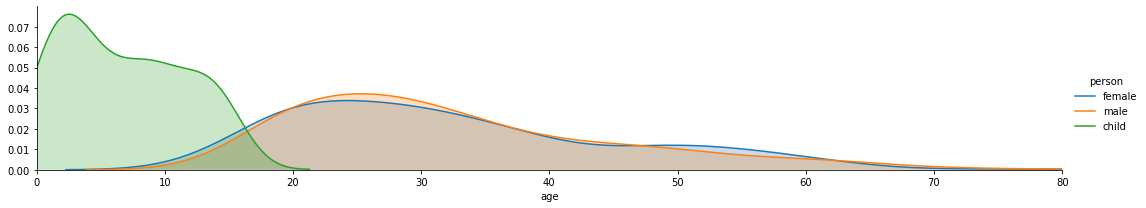

In [67]:
as_fig = sns.FacetGrid(titanic_df,hue='person',aspect=5)
as_fig.map(sns.kdeplot,'age',shade=True)
oldest = titanic_df['age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

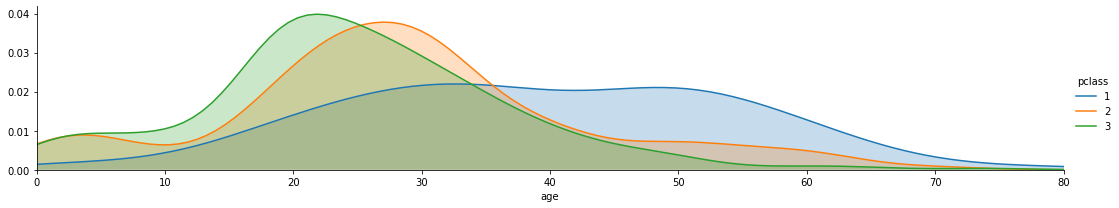

In [68]:
as_fig = sns.FacetGrid(titanic_df,hue='pclass',aspect=5)
as_fig.map(sns.kdeplot,'age',shade=True)
oldest = titanic_df['age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

C:\Users\devel\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


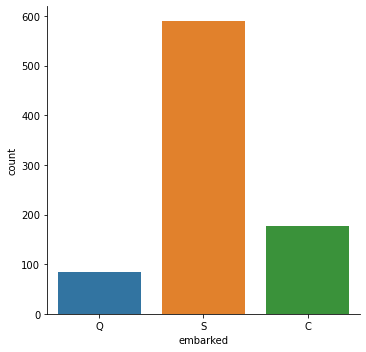

In [69]:
titanic_df['embarked'] = titanic_df['embarked'].fillna('S')
sns.factorplot('embarked',data=titanic_df,kind='count')

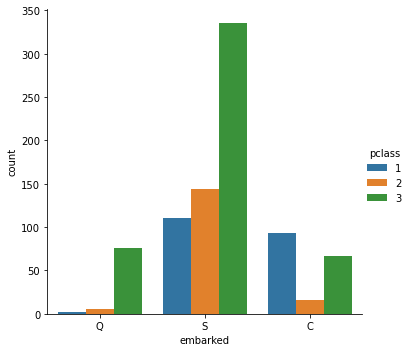

In [70]:
sns.factorplot('embarked',data=titanic_df,hue='pclass',kind='count')

In [71]:
titanic_df['alone'] = titanic_df.parch + titanic_df.sibsp

titanic_df['alone'].loc[titanic_df['alone']>0] = 'With Family'
titanic_df['alone'].loc[titanic_df['alone'] == 0] = 'Without Family'

C:\Users\devel\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


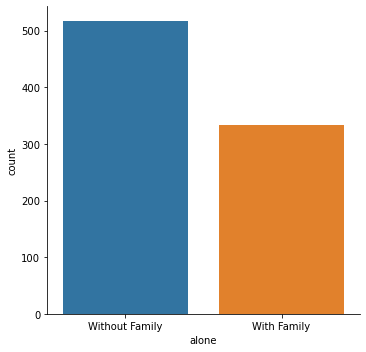

In [72]:
sns.factorplot('alone',kind='count',data=titanic_df)

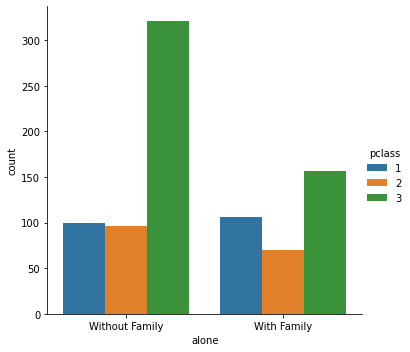

In [73]:
sns.factorplot('alone',kind='count',data=titanic_df,hue='pclass')

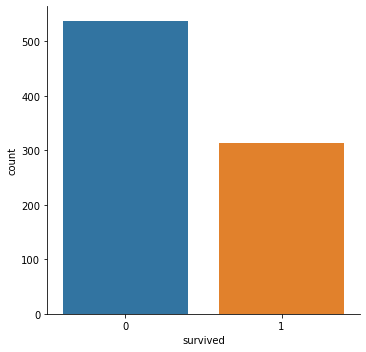

In [74]:
sns.factorplot('survived',data=titanic_df,kind='count')

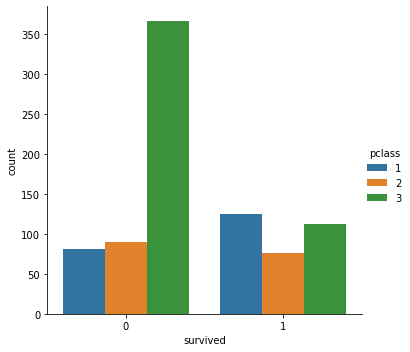

In [75]:
sns.factorplot('survived',data=titanic_df,kind='count',hue='pclass')

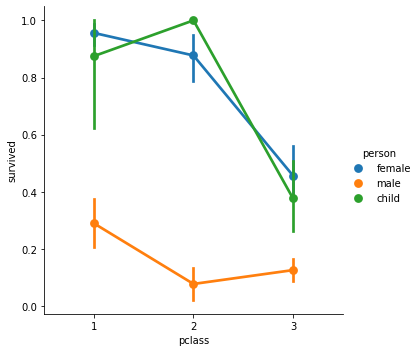

In [76]:
sns.factorplot('pclass','survived',data=titanic_df,hue='person')

C:\Users\devel\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


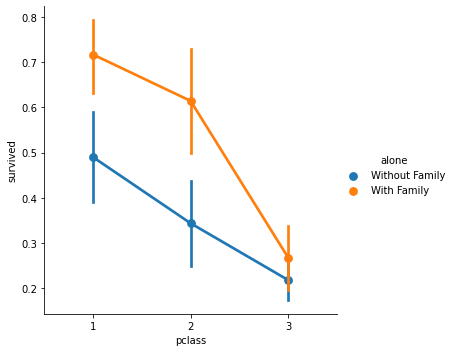

In [77]:
sns.factorplot('pclass','survived',data=titanic_df,hue='alone')

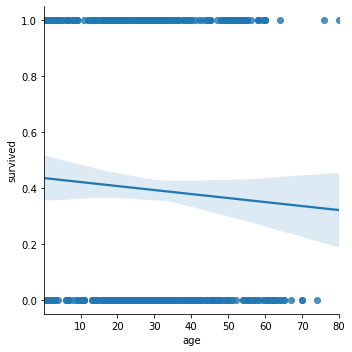

In [78]:
sns.lmplot('age','survived',data=titanic_df)

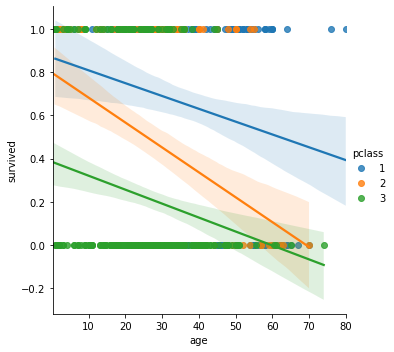

In [79]:
sns.lmplot('age','survived',data=titanic_df,hue='pclass')

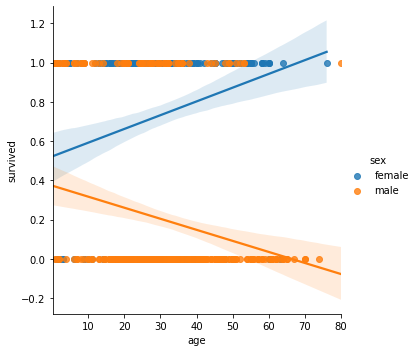

In [80]:
sns.lmplot('age','survived',data=titanic_df,hue='sex')

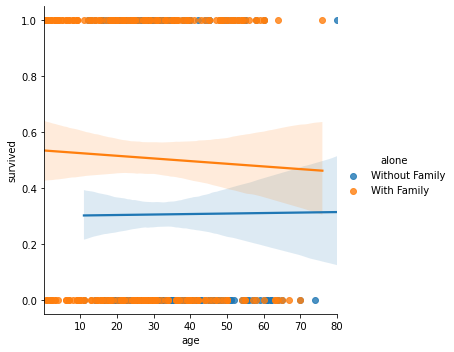

In [81]:
sns.lmplot('age','survived',data=titanic_df,hue='alone')

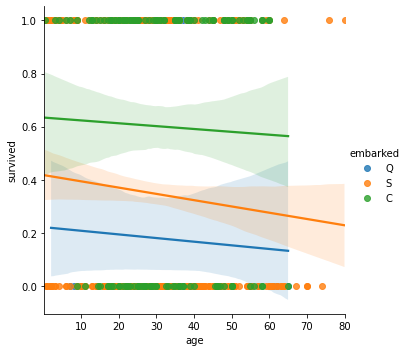

In [82]:
sns.lmplot('age','survived',data=titanic_df,hue='embarked')